<a href="https://colab.research.google.com/github/TechBlastersNoob/Machine-Learning-Coding-Ninjas/blob/main/LOGISTIC_REGRESSION_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
traindata=pd.read_csv('training.csv')
traindata.head(6)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.0000,NaN,S,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S,0
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,0
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,0
4,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,0
5,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C,0


In [5]:
traindata.tail(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
666,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,0
667,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,1


#DATA ANALYSIS

In [4]:
traindata.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         132
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       514
Embarked      1
Survived      0
dtype: int64

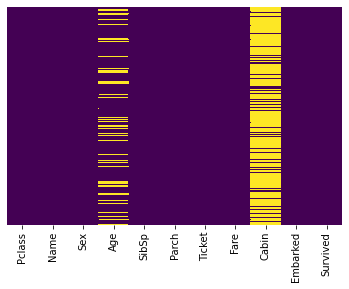

In [7]:
sns.heatmap(traindata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

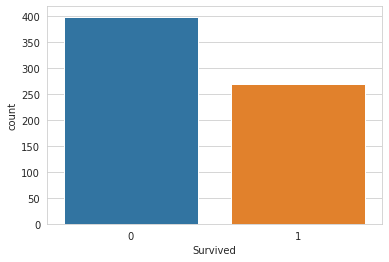

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=traindata)

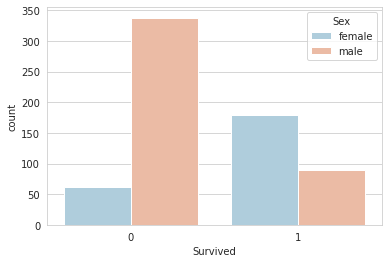

In [12]:
sns.countplot(x='Survived',data=traindata,hue='Sex',palette='RdBu_r')

#people that did not survive were much more likely to be men. While those who survived were twice as likely to be female.

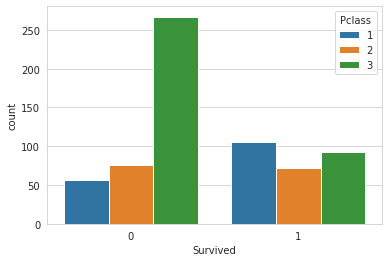

In [15]:
sns.countplot(x='Survived',data=traindata,hue='Pclass')

**Also it looks like the people who did not survive were overwhelmingly part of 3rd class. People that did survive were from the higher classes.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


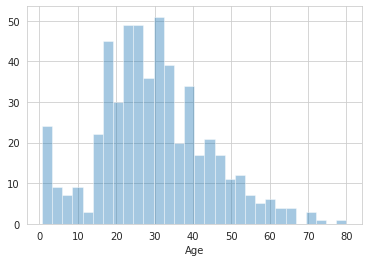

In [17]:
sns.distplot(traindata['Age'].dropna(),bins=30,kde=False)

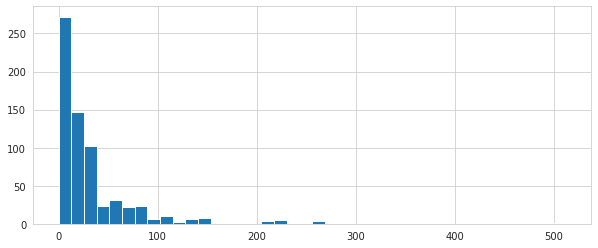

In [19]:
traindata['Fare'].hist(bins=40,figsize=(10,4))

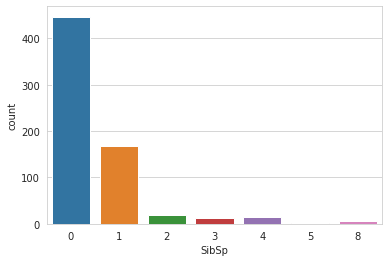

In [21]:
sns.countplot(x='SibSp',data=traindata)

#DATA CLEANING

**Lets first try and fill in the missing age values. I'm going to do this by filling in the missing age with the mean age of the passenger class that the passenger belongs to.**

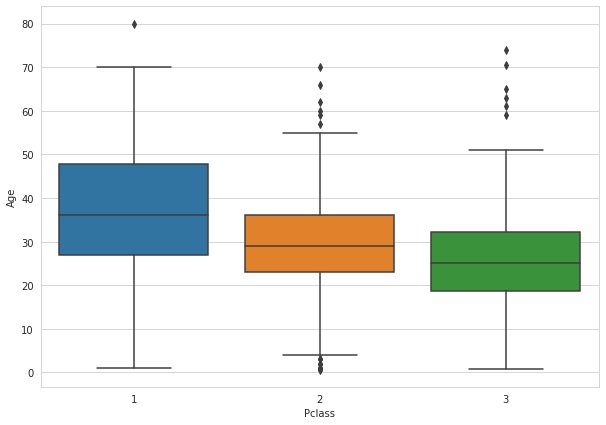

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=traindata)

In [25]:
mean_class1 = traindata.groupby('Pclass').mean()['Age'].round().loc[1]
mean_class2 = traindata.groupby('Pclass').mean()['Age'].round().loc[2]
mean_class3 = traindata.groupby('Pclass').mean()['Age'].round().loc[3]

In [28]:
traindata.loc[traindata['Pclass']==1,'Age'] = traindata.loc[traindata['Pclass']==1,'Age'].fillna(value=mean_class1)
traindata.loc[traindata['Pclass']==2,'Age'] = traindata.loc[traindata['Pclass']==2,'Age'].fillna(value=mean_class2)
traindata.loc[traindata['Pclass']==3,'Age'] = traindata.loc[traindata['Pclass']==3,'Age'].fillna(value=mean_class3)

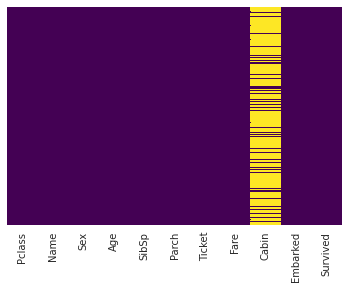

In [30]:
sns.heatmap(traindata.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [31]:
traindata.drop('Cabin',axis=1,inplace=True)

In [33]:
traindata.dropna(inplace=True)

In [34]:
sex = pd.get_dummies(traindata['Sex'],drop_first=True)
embark = pd.get_dummies(traindata['Embarked'],drop_first=True)
traindata = pd.concat([traindata,sex,embark],axis=1)

In [36]:
traindata.head(4)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S
0,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.0,1,0,228414,26.000,S,1,0,0,1
1,3,"Williams, Mr. Howard Hugh ""Harry""",male,26.0,0,0,A/5 2466,8.050,S,0,1,0,1
2,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.000,S,0,1,0,1
3,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,S,0,0,0,1


In [48]:
traindata.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [51]:
traindata.head(4)

,Pclass,Age,SibSp,Parch,Fare,Survived,male,Q,S
0,2,29.0,1,0,26.000,1,0,0,1
1,3,26.0,0,0,8.050,0,1,0,1
2,2,39.0,0,0,26.000,0,1,0,1
3,3,29.0,0,4,21.075,0,0,0,1


In [39]:
test = pd.read_csv('test.csv')

In [40]:
test.loc[test['Pclass']==1,'Age'] = test.loc[test['Pclass']==1,'Age'].fillna(value=mean_class1)
test.loc[test['Pclass']==2,'Age'] = test.loc[test['Pclass']==2,'Age'].fillna(value=mean_class2)
test.loc[test['Pclass']==3,'Age'] = test.loc[test['Pclass']==3,'Age'].fillna(value=mean_class3)

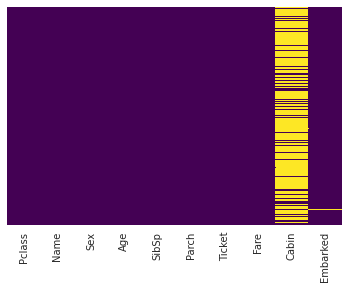

In [41]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
test.drop('Cabin',axis=1,inplace=True)
test.dropna(inplace=True)
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,sex,embark],axis=1)
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [43]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,2,8.0,1,1,36.7500,1,0,1
1,1,49.0,0,0,25.9292,0,0,1
2,3,26.0,0,0,7.7375,1,1,0
3,2,24.0,2,1,27.0000,0,0,1
4,1,36.0,0,0,26.2875,1,0,1


In [52]:
X = traindata.drop('Survived',axis=1)
y = traindata['Survived']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LogisticRegression


In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [55]:
logmodel.score(X_train,y_train)

0.8090128755364807

In [56]:
logmodel.score(X_test,y_test)

0.8109452736318408

In [59]:
predictions = logmodel.predict(test)

In [60]:
final_prediction = pd.DataFrame({'Survived':predictions})

In [61]:
final_prediction.head()

,Survived
0,0
1,1
2,0
3,1
4,0


In [62]:
final_prediction.to_csv('ans.csv')